# 数据挖掘零基础——数据探索性分析(EDA)

## EDA

是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过
作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

#### EDA的目标：

1.熟悉数据集   
2.探索各个变量跟目标或者预测变量的关系

PS:EDA应该是有一个很大范畴内容，由于是零基础，所以这里不过多阐述

## 代码部分:
### Step1 导入包

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #缺失值可视化工具


In [4]:
path = 'D:\\excelsior\\DataMining\\Data\\UsedCar\\'

Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv( path + 'used_car_testA_20200313.csv', sep=' ')


In [11]:
# 查看数据的基本信息

Train_data.shape
Train_data.info()
Train_data.head().append(Train_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [12]:
Test_data.head().append(Train_data.tail())

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,...,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,150000,5.0,4,20160329,1.0,1.0,15.0,222.0,66932,0.0,...,0.620011,-3.664654,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867
1,150001,0.0,21,20160404,0.0,0.0,12.5,19.0,174960,1.0,...,-1.541230,-0.757055,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383
2,150002,0.0,21,20160308,0.0,0.0,7.0,82.0,5356,0.0,...,0.138226,0.754033,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540
3,150003,0.0,0,20160325,0.0,1.0,7.0,0.0,50688,0.0,...,0.366038,1.312775,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268
4,150004,2.0,14,20160309,0.0,0.0,15.0,26.0,161428,0.0,...,-0.025678,-0.101290,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709
149995,149995,4.0,10,20160327,0.0,1.0,15.0,121.0,163978,0.0,...,-1.304370,-0.302592,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174
149996,149996,0.0,11,20160312,0.0,0.0,10.0,116.0,184535,0.0,...,0.924196,-0.272160,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371
149997,149997,1.0,11,20160328,1.0,0.0,6.0,60.0,147587,0.0,...,1.891922,0.414931,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914
149998,149998,3.0,10,20160401,1.0,0.0,15.0,34.0,45907,0.0,...,0.431981,-1.659014,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498
149999,149999,6.0,28,20160305,0.0,1.0,12.5,19.0,177672,0.0,...,-1.483350,-0.342674,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819


In [15]:
Test_data.columns


Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [16]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

### 观察数据情况

In [17]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [18]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


#### 缺失值和异常值

In [19]:
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [20]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

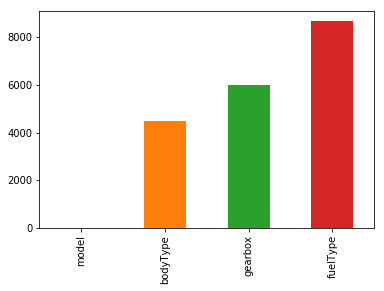

In [21]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


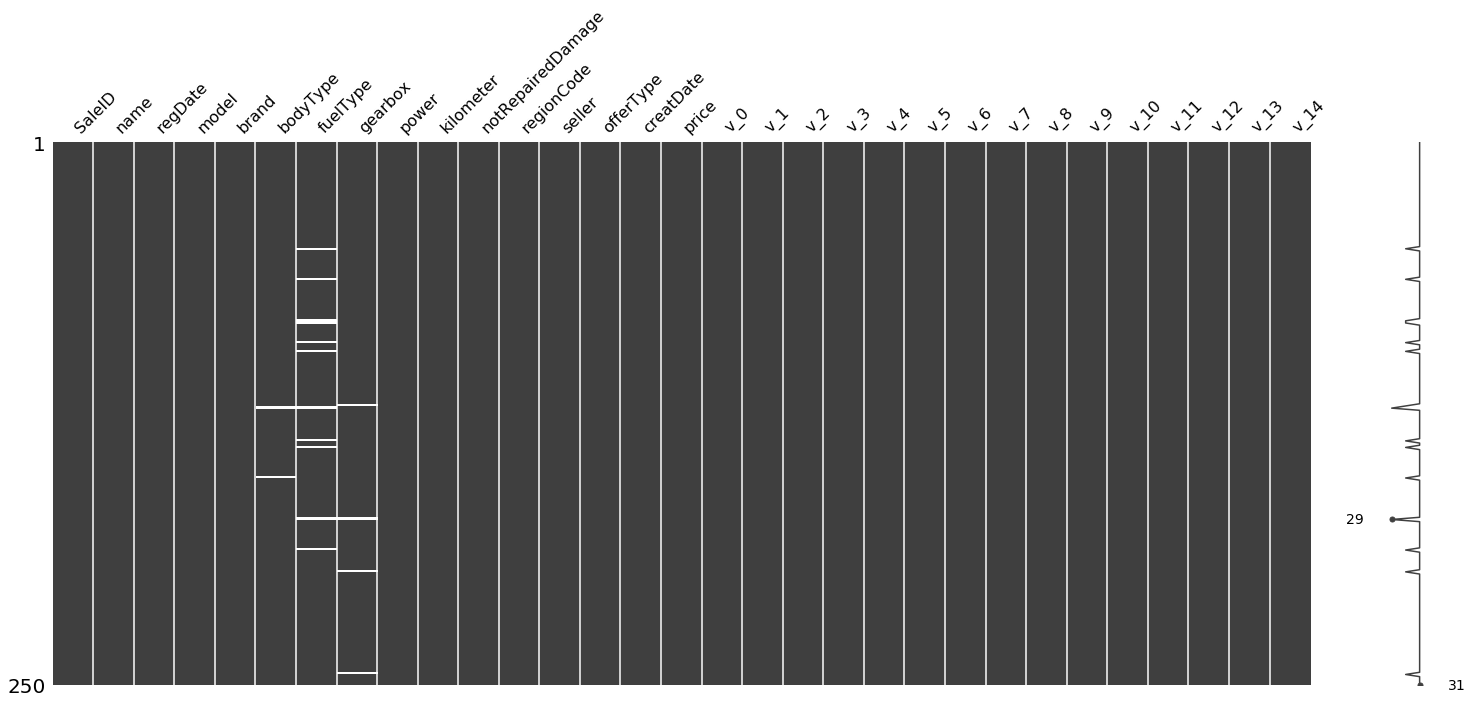

In [22]:
msno.matrix(Train_data.sample(250))

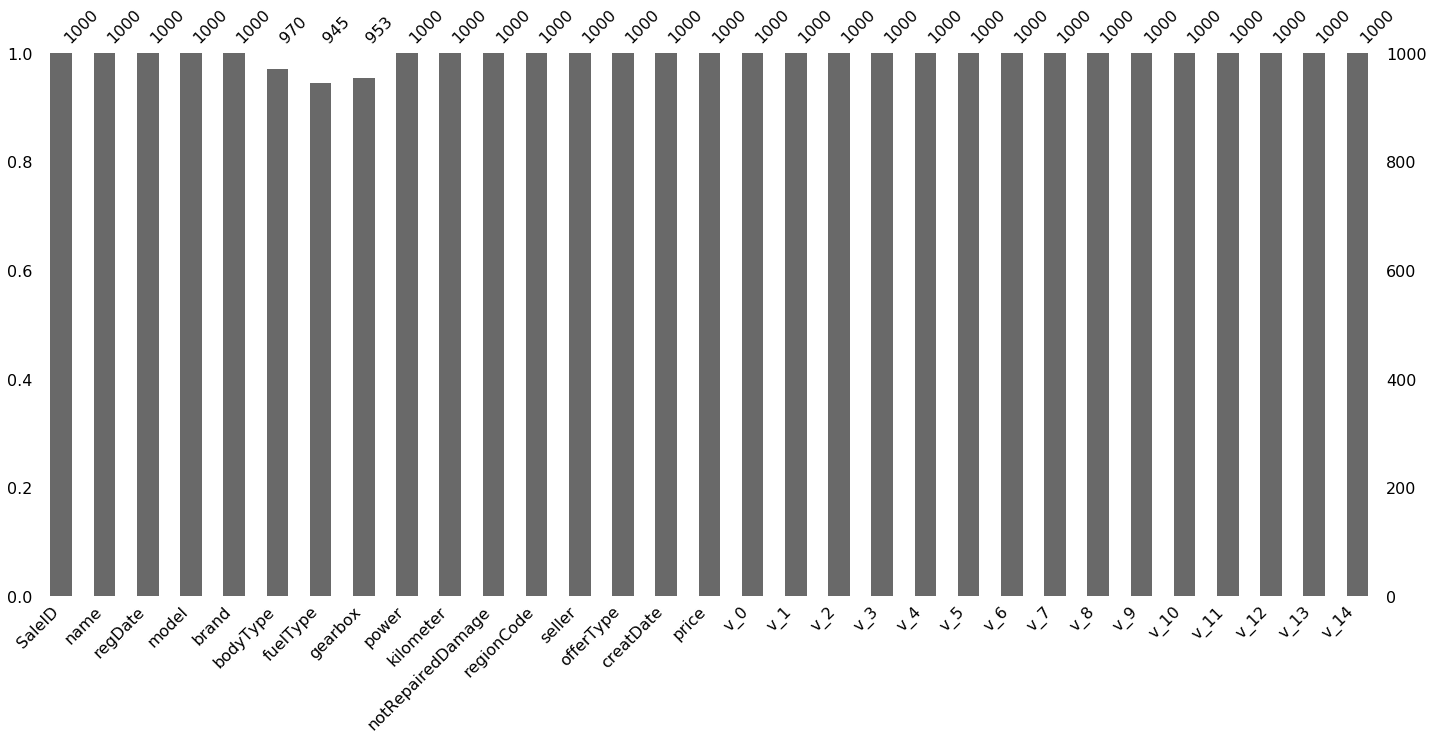

In [23]:
msno.bar(Train_data.sample(1000))

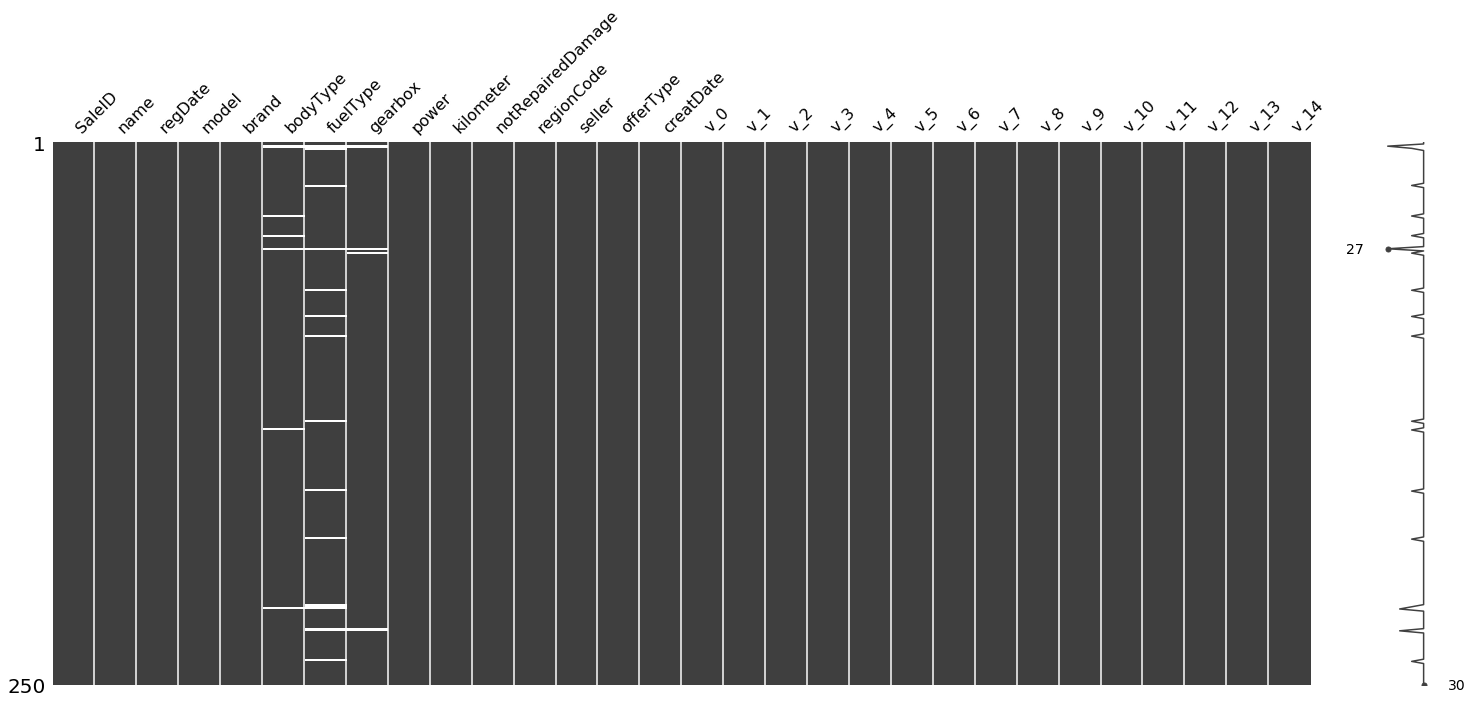

In [24]:
msno.matrix(Test_data.sample(250))

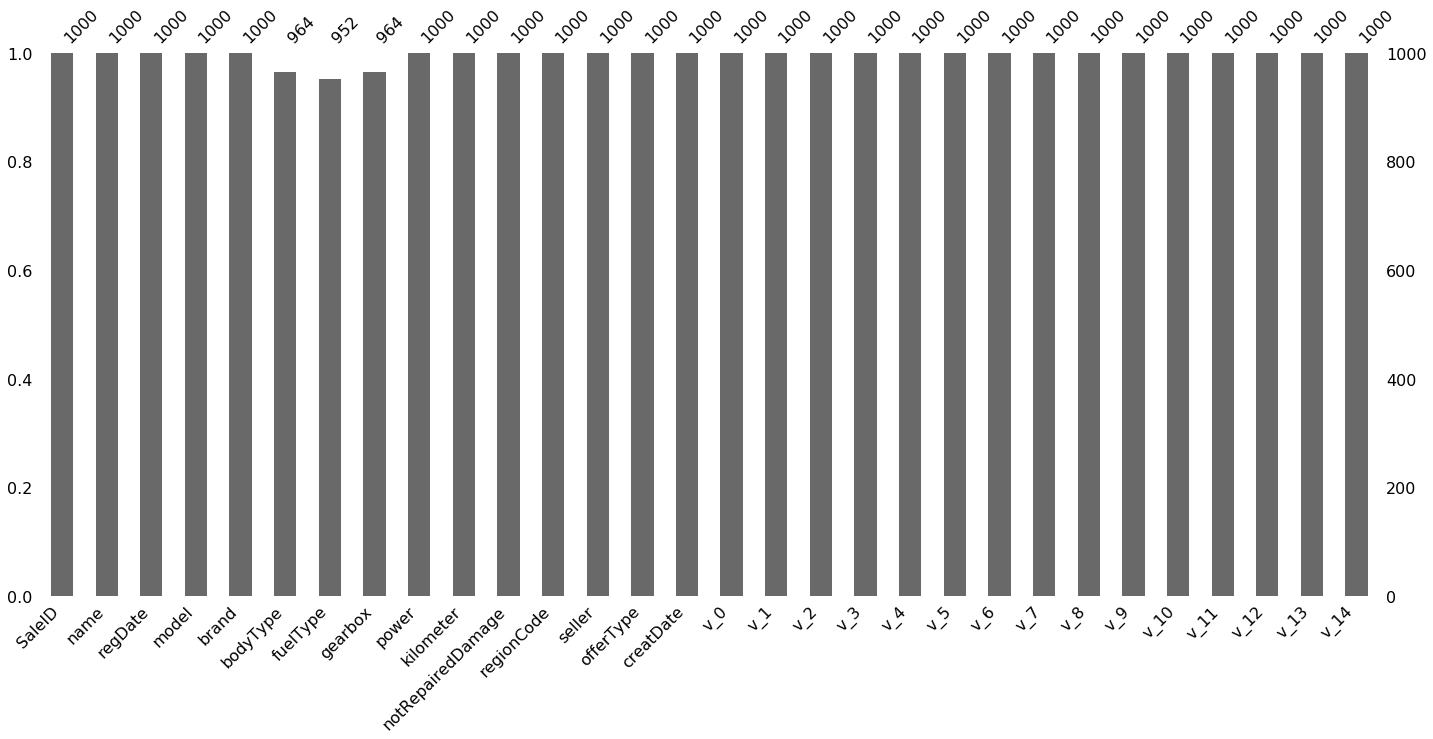

In [25]:
msno.bar(Test_data.sample(1000))

#### 异常值检测

In [26]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [27]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

对于上面的字符类特征，发现异常值‘-’,可以转换成nan

In [28]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [29]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [30]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [31]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [32]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

#### 变量相关性分析 ，可以去除跟预测变量相关性很小的特征

In [33]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

#### 了解预测值分布

In [34]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

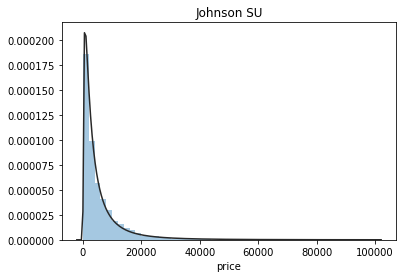

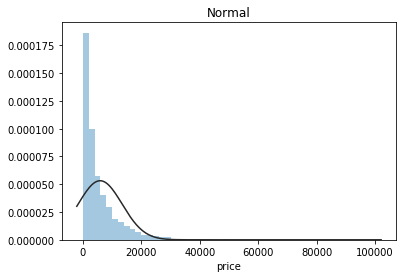

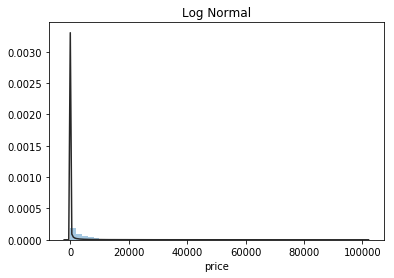

In [40]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


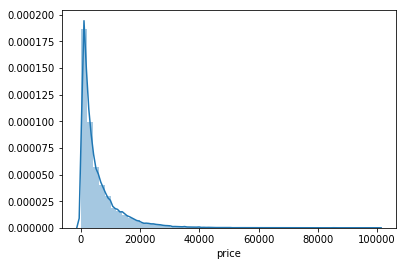

In [41]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

In [43]:
Train_data.skew(), Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

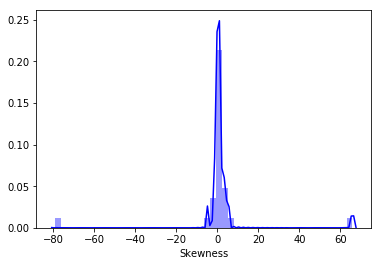

In [45]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

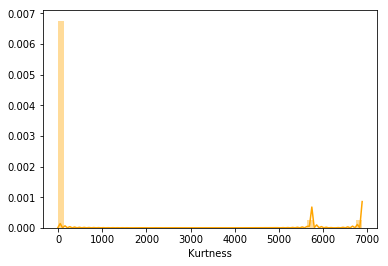

In [46]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

skew()   
偏度 Skewness   
是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度。。

kurt()
峰度 Kurtosis   
偏度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度。
峰度是四阶标准矩计算出来的
   

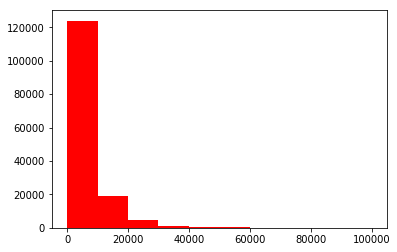

In [47]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

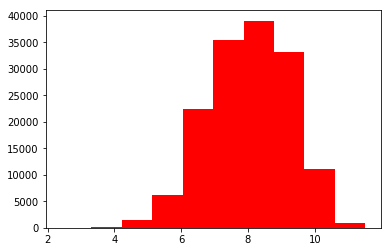

In [48]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

观察频数，观测预测值里面的异常值，考虑是否删除或者填充

#### 特征分析

对类别特征查看unique分布